In [1]:
# http://arohatgi.info/WebPlotDigitizer/app/
# http://arxiv.org/abs/1107.4367

In [2]:
%pylab inline

rc('text', usetex=True, fontsize=28)

Populating the interactive namespace from numpy and matplotlib


/usr/lib/python2.7/dist-packages/matplotlib/__init__.py:857: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
data = loadtxt('Westphal-BX154_kulas_data.csv', delimiter=',')

x = data[:,0]/(1+2.5954) #redshift z = 2.5954
y = data[:,1]

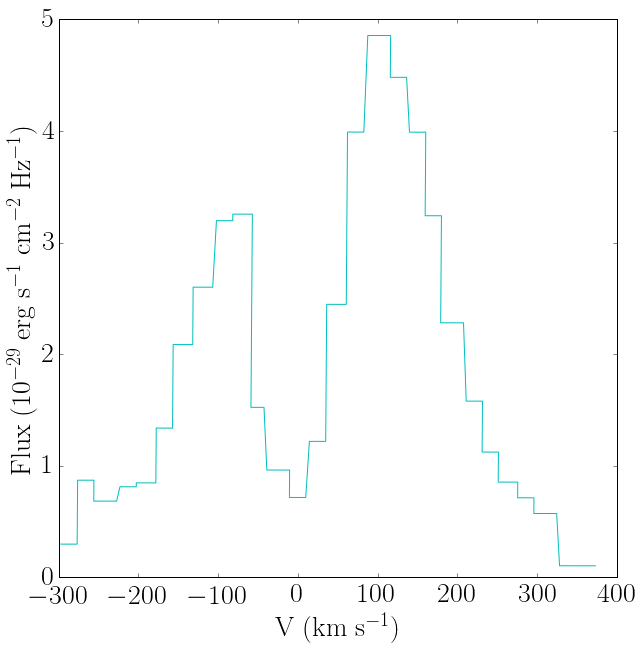

In [4]:
f = figure(figsize = (10,10))
plot(x,y,c='c')
xlabel('$\mathrm{V\;(km\;s^{-1})}$')
ylabel('$\mathrm{Flux\;(10^{-29}\;erg\;s^{-1}\;cm^{-2}\;Hz^{-1})}$')
savefig('observation_v.png')

In [5]:
v_th = -12.8
x_x = flipud(x/v_th)
y_x = flipud(y)

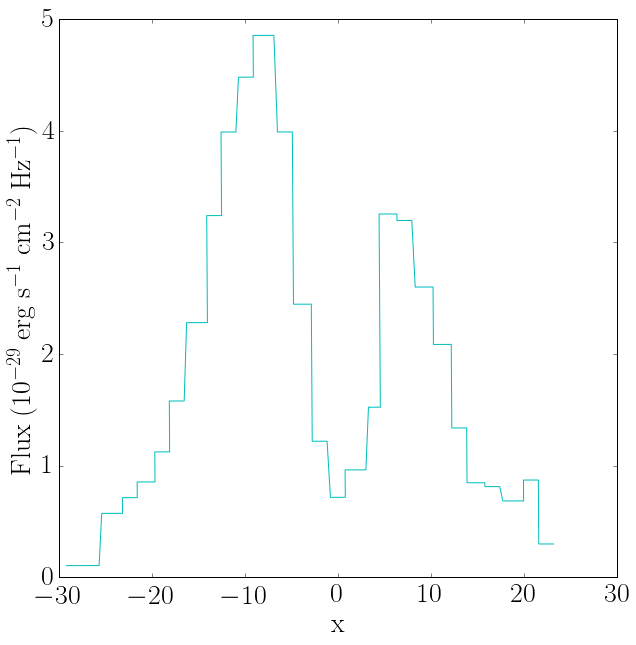

In [6]:
f = figure(figsize = (10,10))
plot(x_x,y_x,c='c')
xlabel('$\mathrm{x}$')
ylabel('$\mathrm{Flux\;(10^{-29}\;erg\;s^{-1}\;cm^{-2}\;Hz^{-1})}$')
savefig('observation_x.png')

In [7]:
from emcee_skewed_gaussian import emcee_skewed_gaussian, sum_2_skewed_gaussian

In [8]:
#Initial guess

half = len(y_x)/2
    
#First guess
amplitude_neg = 12*max(y_x[0:half+1])
center_neg = mean(x_x[0:half+1])
sigma_neg = std(x_x[0:half+1])
gamma_neg = -2
amplitude_pos = 12*max(y_x[half:-1])
center_pos = mean(x_x[half:-1])
sigma_pos = std(x_x[half:-1])
gamma_pos = 2

x_x_fit0 = x_x
y_x_fit0 = sum_2_skewed_gaussian(x_x, amplitude_neg, center_neg, sigma_neg, gamma_neg, amplitude_pos, center_pos, sigma_pos, gamma_pos)

In [9]:
print amplitude_neg, center_neg, sigma_neg, gamma_neg, amplitude_pos, center_pos, sigma_pos, gamma_pos

58.2589196453 -14.2972777361 7.67475119219 -2 39.052211771 10.26993492 7.03356485494 2


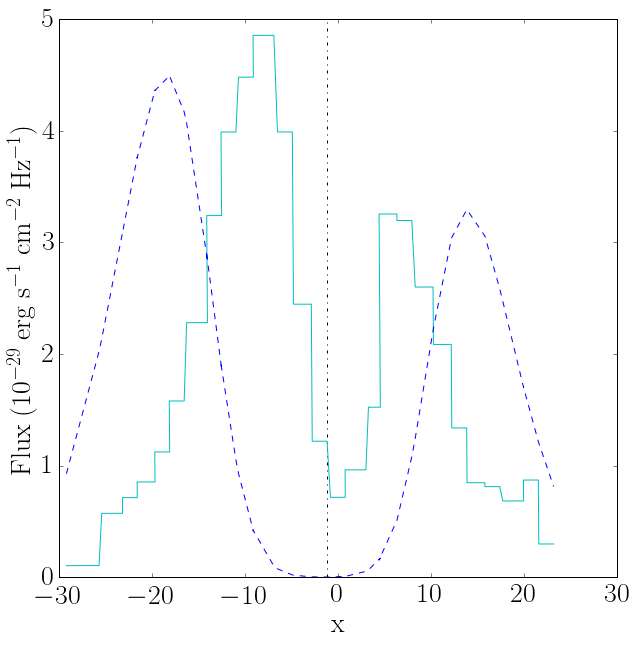

In [10]:
f = figure(figsize = (10,10))
plot(x_x, y_x, c='c')
plot(x_x_fit0, y_x_fit0, c='b', linestyle='--')
vlines(x_x[half],0,5,linestyle='-.')
xlabel('$\mathrm{x}$')
ylabel('$\mathrm{Flux\;(10^{-29}\;erg\;s^{-1}\;cm^{-2}\;Hz^{-1})}$')

In [11]:
amplitude_neg, center_neg, sigma_neg, gamma_neg, amplitude_pos, center_pos, sigma_pos, gamma_pos = emcee_skewed_gaussian(x_x, y_x)

Mean acceptance fraction: 0.264
amplitude_neg =  (52.812986001605537, 8.6202517866990931, 6.3888952728712809)
center_neg =  (-17.047476231081788, 11.212962067239982, 1.6296810932348897)
sigma_neg =  (1198613598.4209106, 128760771596.31877, 1180003988.74509)
gamma_neg =  (4.6025094271765639, 2.7025192955642323, 4.8600602126210672)
amplitude_pos =  (61.845244073860584, 74.591672051618247, 27.729696128519699)
center_pos =  (11.61018025209934, 22.07575934162476, 24.343358460961223)
sigma_pos =  (16.133069588652965, 19.130881201070657, 10.663217782864621)
gamma_pos =  (1.151027705992802, 5.5266576354649004, 6.8427972978638927)


In [12]:
x_x_fit = x_x
y_x_fit = sum_2_skewed_gaussian(x_x_fit, amplitude_neg, center_neg, sigma_neg, gamma_neg, amplitude_pos, center_pos, sigma_pos, gamma_pos)

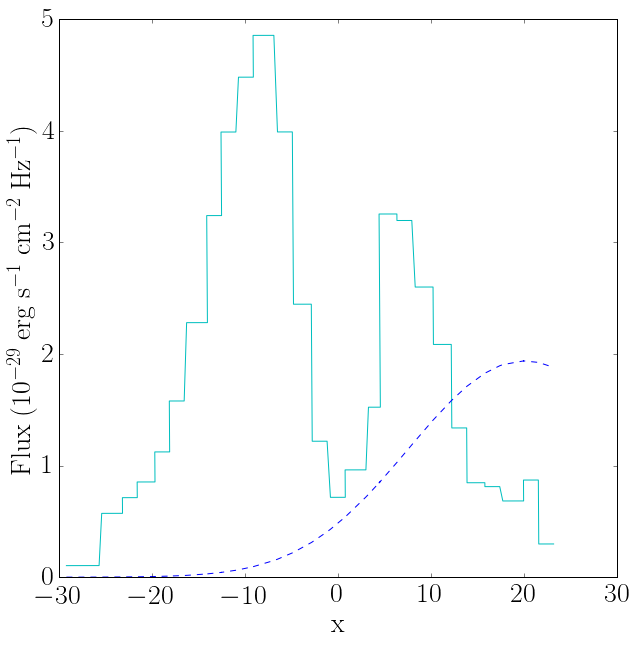

In [13]:
f = figure(figsize = (10,10))
plot(x_x, y_x, c='c')
plot(x_x_fit, y_x_fit, c='b', linestyle='--')
xlabel('$\mathrm{x}$')
ylabel('$\mathrm{Flux\;(10^{-29}\;erg\;s^{-1}\;cm^{-2}\;Hz^{-1})}$')
savefig('gaussian_fit_kulas.png')

In [14]:
gaussian_fit_file = open('gaussian_fit_kulas.dat','w')
gaussian_fit_file.write('amplitude_neg\tsigma_neg\tcenter_neg\tgamma_neg\tamplitude_pos\tsigma_pos\tcenter_pos\tgamma_pos\n')
gaussian_fit_file.write(str(amplitude_neg)+'\t'+str(sigma_neg)+'\t'+str(center_neg)+'\t'+str(gamma_neg)+'\t'+str(amplitude_pos)+'\t'+str(sigma_pos)+'\t'+str(center_pos)+'\t'+str(gamma_pos))
gaussian_fit_file.close()

In [15]:
print sigma_neg

1198613598.42
